In [1]:
import matplotlib.pyplot as plt
%matplotlib inline 
import nltk
import pandas as pd
import re


In [2]:
with open("assassination_attempt/cheatle_hearing.txt", "r") as file:
    cheatle_hearing = file.read()
print(cheatle_hearing) 

with open("assassination_attempt/cheatle_statement.txt", "r") as file:
    cheatle_statement = file.read()
print(cheatle_statement) 


with open("assassination_attempt/rowe_hearing.txt", "r") as file:
    rowe_hearing = file.read()

print(rowe_hearing) 

with open("assassination_attempt/rowe_testimony.txt", "r", encoding="utf-8") as file:
    rowe_statement = file.read()
print(rowe_statement) 

Transcript


0:00
presenting an active threat so I'd like to ask you director cheeter to clarify the protoc what the protocol is for
0:05
postponing or canceling an event based on a threat and how the events on July 13th didn't meet those
0:12
standards so again I think we're talking about the distinction between suspicious behavior and a threat and at the time
0:20
that this individual was identified they were displaying suspicious to behavior I'm still waiting for interviews from
0:27
the FBI to determine what it was that identified that individual as suspicious
0:33
and what those behaviors were to to that question is suspicious Behavior does suspicious Behavior vary between
0:39
different events for instance if we have an event with a president would there not be a heightened standard for
0:44
suspicious Behavior I think that there are a number of ways that someone could be identified
0:50
as suspicious uh and it doesn't matter whether it's at a rally or an indoor
0:56
event or who

## Text Preprocess Cleaning

In [3]:
# cheatle_statement = cheatle_statement.lower()
documents = {}

with open("assassination_attempt/cheatle_hearing.txt", "r") as file:
    documents["cheatle_hearing"] = file.read()

with open("assassination_attempt/cheatle_statement.txt", "r") as file:
    documents["cheatle_statement"] = file.read()

with open("assassination_attempt/rowe_hearing.txt", "r") as file:
    documents["rowe_hearing"] = file.read()

with open("assassination_attempt/rowe_testimony.txt", "r", encoding="utf-8") as file:
    documents["rowe_statement"] = file.read()

def tokenize_rawtxt(text):
    # first convert to lowercase
    lower_txt = text.lower()
    tokenize_txt = nltk.tokenize.word_tokenize(lower_txt) # tokenize 
    return (text, tokenize_txt)

for doc_name, text in documents.items():
    raw_text, tokens = tokenize_rawtxt(text)
    documents[doc_name] = tokens

for k, v in documents.items():
    documents[k] = [word for word in v if word.isalpha()]

print("First 20 tokens from 'cheatle_hearing':")
print(documents["cheatle_hearing"][:20])

print("First 20 tokens from 'cheatle_statement':")
print(documents["cheatle_statement"][:20])

print("First 20 tokens from 'rowe_hearing':")
print(documents["rowe_hearing"][:20])

print("First 20 tokens from 'rowe_statement':")
print(documents["rowe_statement"][:20])


First 20 tokens from 'cheatle_hearing':
['transcript', 'presenting', 'an', 'active', 'threat', 'so', 'i', 'like', 'to', 'ask', 'you', 'director', 'cheeter', 'to', 'clarify', 'the', 'protoc', 'what', 'the', 'protocol']
First 20 tokens from 'cheatle_statement':
['written', 'testimony', 'from', 'director', 'kimberly', 'cheatle', 'to', 'the', 'oversight', 'committee', 'on', 'the', 'attempted', 'assassination', 'of', 'former', 'president', 'trump', 'published', 'by']
First 20 tokens from 'rowe_hearing':
['launched', 'in', 'which', 'we', 'launched', 'shortly', 'after', 'the', 'assassination', 'attempt', 'took', 'place', 'our', 'teams', 'are', 'still', 'collecting', 'critical', 'information', 'speaking']
First 20 tokens from 'rowe_statement':
['good', 'morning', 'chairman', 'peters', 'chairman', 'durbin', 'ranking', 'member', 'paul', 'ranking', 'member', 'graham', 'and', 'distinguished', 'members', 'of', 'the', 'committees', 'thank', 'you']


In [4]:
from __future__ import division
from itertools import chain

words = list(chain.from_iterable(documents.values()))
vocab = set(words)
lexical_diversity = len(words)/len(vocab)
print ("Vocabulary size: ",len(vocab),"\nTotal number of tokens: ", len(words), \
"\nLexical diversity: ", lexical_diversity)

Vocabulary size:  5157 
Total number of tokens:  147079 
Lexical diversity:  28.520263719216597


In [5]:
from nltk.probability import *
fd_1 = FreqDist(words)
fd_1.most_common(25)

[('the', 8047),
 ('that', 4692),
 ('to', 4680),
 ('and', 3951),
 ('you', 3610),
 ('i', 3524),
 ('of', 3156),
 ('a', 3025),
 ('in', 2055),
 ('is', 1843),
 ('we', 1781),
 ('uh', 1715),
 ('have', 1675),
 ('was', 1564),
 ('on', 1404),
 ('it', 1371),
 ('this', 1234),
 ('not', 1157),
 ('are', 1156),
 ('for', 1073),
 ('there', 1043),
 ('do', 959),
 ('with', 889),
 ('service', 886),
 ('secret', 880)]

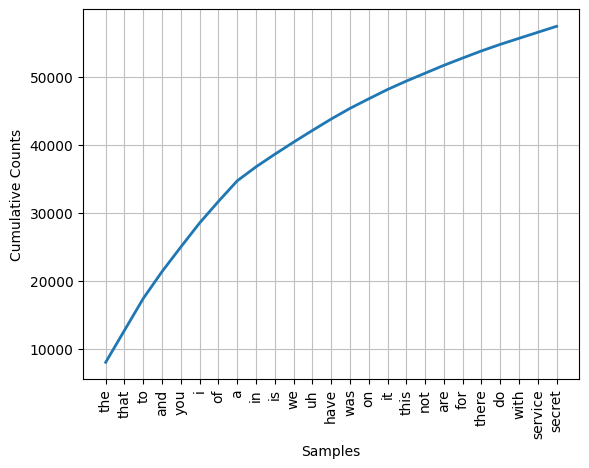

<Axes: xlabel='Samples', ylabel='Cumulative Counts'>

In [6]:
fd_1.plot(25, cumulative=True)

In [7]:
words_2 = list(chain.from_iterable([set(value) for value in documents.values()]))
fd_2 = FreqDist(words_2)
fd_2.most_common(25)

[('agents', 4),
 ('place', 4),
 ('ultimate', 4),
 ('know', 4),
 ('challenges', 4),
 ('transparent', 4),
 ('making', 4),
 ('visit', 4),
 ('detail', 4),
 ('since', 4),
 ('understanding', 4),
 ('specific', 4),
 ('must', 4),
 ('out', 4),
 ('working', 4),
 ('within', 4),
 ('as', 4),
 ('directed', 4),
 ('until', 4),
 ('site', 4),
 ('the', 4),
 ('sacrifice', 4),
 ('highly', 4),
 ('failed', 4),
 ('open', 4)]

In [34]:
import nltk
from nltk.corpus import stopwords

# Download the stopwords dataset
nltk.download('stopwords')

# Correct usage of stopwords
stop_words = set(stopwords.words('english'))

additional_stopwords = {
    'uh', 'um', 'like', 'yep', 'mr','mrs','nope', 'ok', 'okay', 'hmm', 
    'uhhuh', 'gonna', 'wanna', 'gotta', 'kinda', 'sorta'}


stop_words.update(additional_stopwords)

# Remove stopwords from your documents
for doc_name, tokens in documents.items():
    documents[doc_name] = [word for word in tokens if word not in stop_words]


print(documents["cheatle_hearing"][:20])


['transcript', 'presenting', 'active', 'threat', 'ask', 'director', 'cheeter', 'clarify', 'protoc', 'protocol', 'postponing', 'canceling', 'event', 'based', 'threat', 'events', 'july', 'meet', 'standards', 'think']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [35]:
words_3 = list(chain.from_iterable(documents.values()))
fd_3 = FreqDist(words_3)
list(vocab - set(fd_3.keys()))

['few',
 'now',
 'ok',
 'doing',
 'and',
 're',
 'her',
 'okay',
 'itself',
 'between',
 'if',
 'for',
 'out',
 'where',
 'having',
 'um',
 'at',
 'were',
 'all',
 'him',
 'has',
 'it',
 'should',
 'more',
 'our',
 'by',
 'own',
 'when',
 'that',
 'there',
 'over',
 'because',
 'to',
 'as',
 'ain',
 'most',
 'than',
 'but',
 'yours',
 'did',
 'a',
 'ours',
 'been',
 'just',
 'was',
 'during',
 'be',
 'through',
 'who',
 'off',
 'you',
 'once',
 'before',
 'your',
 'these',
 'very',
 'both',
 'further',
 'until',
 'of',
 'the',
 'o',
 'am',
 'themselves',
 'such',
 'how',
 'any',
 'yourself',
 'their',
 'had',
 'what',
 'under',
 'each',
 'ma',
 'his',
 'too',
 'not',
 'or',
 'we',
 'mr',
 'he',
 'haven',
 'uh',
 'into',
 'this',
 'down',
 'same',
 'up',
 'them',
 'are',
 't',
 'does',
 'from',
 'on',
 'whom',
 'after',
 'can',
 'like',
 'here',
 'then',
 'himself',
 'why',
 'do',
 'its',
 'nor',
 'against',
 'me',
 'she',
 'they',
 'have',
 'while',
 'in',
 'only',
 'ourselves',
 'myse

In [36]:
fd_3.most_common(25)

[('service', 886),
 ('secret', 880),
 ('president', 636),
 ('people', 527),
 ('would', 468),
 ('know', 467),
 ('trump', 443),
 ('think', 418),
 ('director', 404),
 ('security', 394),
 ('want', 345),
 ('thank', 329),
 ('one', 321),
 ('question', 312),
 ('going', 300),
 ('today', 289),
 ('answer', 288),
 ('threat', 286),
 ('information', 283),
 ('yes', 282),
 ('day', 280),
 ('roof', 275),
 ('us', 271),
 ('law', 270),
 ('time', 267)]

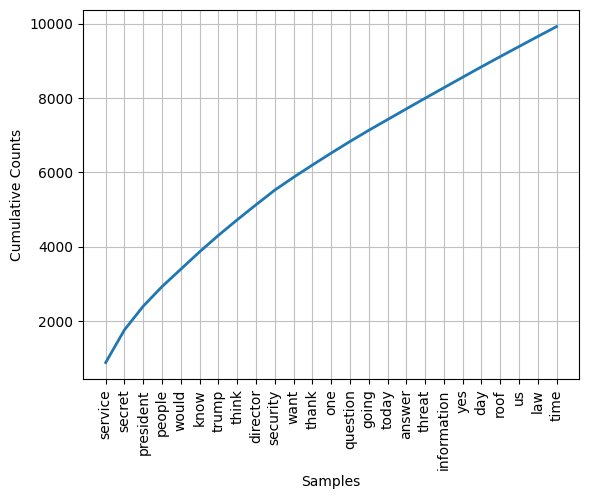

<Axes: xlabel='Samples', ylabel='Cumulative Counts'>

In [37]:
fd_3.plot(25, cumulative=True)

In [12]:
words_3

['transcript',
 'presenting',
 'active',
 'threat',
 'like',
 'ask',
 'director',
 'cheeter',
 'clarify',
 'protoc',
 'protocol',
 'postponing',
 'canceling',
 'event',
 'based',
 'threat',
 'events',
 'july',
 'meet',
 'standards',
 'think',
 'talking',
 'distinction',
 'suspicious',
 'behavior',
 'threat',
 'time',
 'individual',
 'identified',
 'displaying',
 'suspicious',
 'behavior',
 'still',
 'waiting',
 'interviews',
 'fbi',
 'determine',
 'identified',
 'individual',
 'suspicious',
 'behaviors',
 'question',
 'suspicious',
 'behavior',
 'suspicious',
 'behavior',
 'vary',
 'different',
 'events',
 'instance',
 'event',
 'president',
 'would',
 'heightened',
 'standard',
 'suspicious',
 'behavior',
 'think',
 'number',
 'ways',
 'someone',
 'could',
 'identified',
 'suspicious',
 'uh',
 'matter',
 'whether',
 'rally',
 'indoor',
 'event',
 'protecte',
 'think',
 'law',
 'enforcement',
 'citizens',
 'identify',
 'someone',
 'suspicious',
 'okay',
 'uh',
 'thank',
 'according',
 

In [38]:
import nltk

# Ensure necessary resources are downloaded
nltk.download('averaged_perceptron_tagger')

# Apply POS tagging to the cleaned tokens (words_3)
pos_tags = nltk.pos_tag(words_3)

# Example: Print the first 20 POS-tagged tokens


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\KT\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [39]:
print("First 20 POS-tagged tokens:")
print(pos_tags)


First 20 POS-tagged tokens:
[('transcript', 'NN'), ('presenting', 'VBG'), ('active', 'JJ'), ('threat', 'NN'), ('ask', 'NNS'), ('director', 'NN'), ('cheeter', 'NN'), ('clarify', 'NN'), ('protoc', 'NN'), ('protocol', 'NN'), ('postponing', 'VBG'), ('canceling', 'VBG'), ('event', 'NN'), ('based', 'VBN'), ('threat', 'NN'), ('events', 'NNS'), ('july', 'JJ'), ('meet', 'JJ'), ('standards', 'NNS'), ('think', 'VBP'), ('talking', 'VBG'), ('distinction', 'NN'), ('suspicious', 'JJ'), ('behavior', 'NN'), ('threat', 'NN'), ('time', 'NN'), ('individual', 'JJ'), ('identified', 'VBD'), ('displaying', 'VBG'), ('suspicious', 'JJ'), ('behavior', 'NN'), ('still', 'RB'), ('waiting', 'VBG'), ('interviews', 'NNS'), ('fbi', 'JJ'), ('determine', 'NN'), ('identified', 'VBN'), ('individual', 'JJ'), ('suspicious', 'JJ'), ('behaviors', 'NNS'), ('question', 'VBP'), ('suspicious', 'JJ'), ('behavior', 'NN'), ('suspicious', 'JJ'), ('behavior', 'JJ'), ('vary', 'JJ'), ('different', 'JJ'), ('events', 'NNS'), ('instance', '

In [40]:
# Extract nouns (NN, NNS, NNP, NNPS) and verbs (VB, VBD, VBG, VBN, VBP, VBZ)
nouns = [word for word, tag in pos_tags if tag.startswith('NN')]
verbs = [word for word, tag in pos_tags if tag.startswith('VB')]

# Frequency distribution of nouns and verbs
nouns_fd = nltk.FreqDist(nouns)
verbs_fd = nltk.FreqDist(verbs)

# Print the most common nouns and verbs
print("Most common nouns:", nouns_fd.most_common(10))
print("Most common verbs:", verbs_fd.most_common(10))


Most common nouns: [('service', 881), ('president', 636), ('people', 527), ('director', 404), ('security', 394), ('trump', 328), ('question', 297), ('today', 289), ('threat', 286), ('information', 283)]
Most common verbs: [('know', 374), ('think', 354), ('going', 300), ('want', 285), ('get', 205), ('say', 195), ('said', 194), ('made', 183), ('got', 167), ('make', 160)]


In [41]:
from nltk import RegexpParser

# Define a simple grammar for noun phrases (NP)
grammar = "NP: {<DT>?<JJ>*<NN>+}"

# Create a parser and parse the tagged sentences
parser = RegexpParser(grammar)
parsed_chunks = parser.parse(pos_tags)

# Extract and display noun phrases
noun_phrases = [" ".join(word for word, tag in subtree.leaves()) 
                for subtree in parsed_chunks.subtrees() if subtree.label() == 'NP']

print("Extracted Noun Phrases:", noun_phrases[:10])


Extracted Noun Phrases: ['transcript', 'active threat', 'director cheeter clarify protoc protocol', 'event', 'threat', 'distinction', 'suspicious behavior threat time', 'suspicious behavior', 'fbi determine', 'suspicious behavior']


In [ ]:
# nltk.download('maxent_ne_chunker')
# nltk.download('words')

# Perform NER using the POS-tagged tokens
named_entities = nltk.ne_chunk(pos_tags)

# Extract named entities as a list of tuples (entity type, entity name)
entities = []
for subtree in named_entities:
    if hasattr(subtree, 'label'):
        entity_name = " ".join(word for word, tag in subtree.leaves())
        entity_type = subtree.label()
        entities.append((entity_type, entity_name))

print("Named Entities:", entities[:10])


[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\KT\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\KT\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


Named Entities: [('PERSON', 'clinton'), ('PERSON', 'clinton'), ('PERSON', 'clinton'), ('PERSON', 'clinton')]


In [43]:
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

# Initialize the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Extract adjectives for sentiment analysis
adjectives = [word for word, tag in pos_tags if tag.startswith('JJ')]

# Calculate sentiment scores for the adjectives
adjective_text = " ".join(adjectives)
sentiment_score = sia.polarity_scores(adjective_text)

print("Sentiment score of adjectives:", sentiment_score)


Sentiment score of adjectives: {'neg': 0.167, 'neu': 0.592, 'pos': 0.24, 'compound': 1.0}


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\KT\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


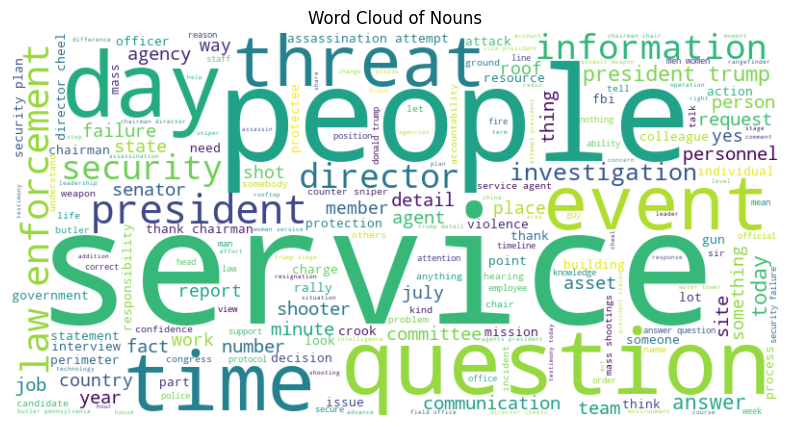

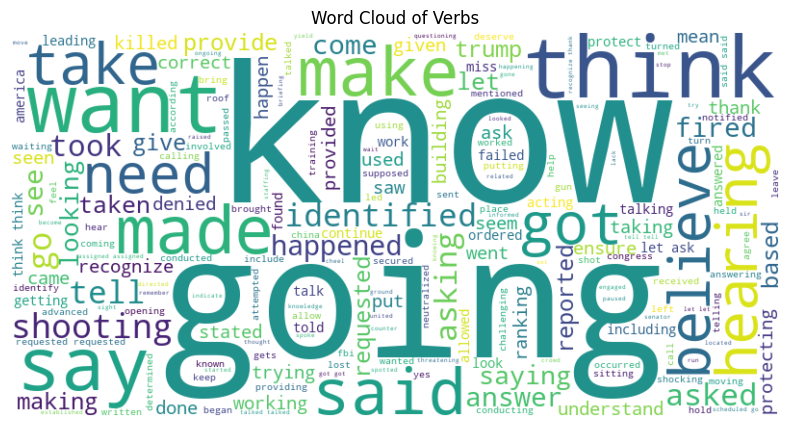

In [44]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word clouds for nouns and verbs
noun_text = " ".join(nouns)
verb_text = " ".join(verbs)

# Create word cloud for nouns
wordcloud_nouns = WordCloud(width=800, height=400, background_color='white').generate(noun_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_nouns, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Nouns")
plt.show()

# Create word cloud for verbs
wordcloud_verbs = WordCloud(width=800, height=400, background_color='white').generate(verb_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_verbs, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Verbs")
plt.show()


## N-gram analysis

In [45]:
from nltk.util import ngrams
from collections import Counter


bigrams = list(ngrams(words_3, 2))
trigrams = list(ngrams(words_3, 3))

common_bigrams = Counter(bigrams).most_common(30)
common_trigrams = Counter(trigrams).most_common(20)

print("Most common bigrams:", common_bigrams)
print("Most common trigrams:", common_trigrams)


Most common bigrams: [(('secret', 'service'), 853), (('president', 'trump'), 250), (('law', 'enforcement'), 246), (('former', 'president'), 180), (('local', 'law'), 139), (('american', 'people'), 129), (('assassination', 'attempt'), 94), (('united', 'states'), 89), (('thank', 'chairman'), 85), (('answer', 'questions'), 76), (('donald', 'trump'), 74), (('counter', 'sniper'), 72), (('director', 'cheel'), 72), (('make', 'sure'), 68), (('answer', 'question'), 65), (('political', 'violence'), 62), (('mass', 'shootings'), 59), (('ranking', 'member'), 58), (('tell', 'us'), 58), (('nine', 'days'), 52), (('chair', 'recognize'), 52), (('security', 'plan'), 50), (('let', 'ask'), 48), (('suspicious', 'person'), 45), (('butler', 'pennsylvania'), 43), (('every', 'day'), 40), (('chair', 'recognizes'), 39), (('want', 'make'), 38), (('without', 'objection'), 38), (('local', 'police'), 36)]
Most common trigrams: [(('local', 'law', 'enforcement'), 137), (('former', 'president', 'trump'), 47), (('want', '

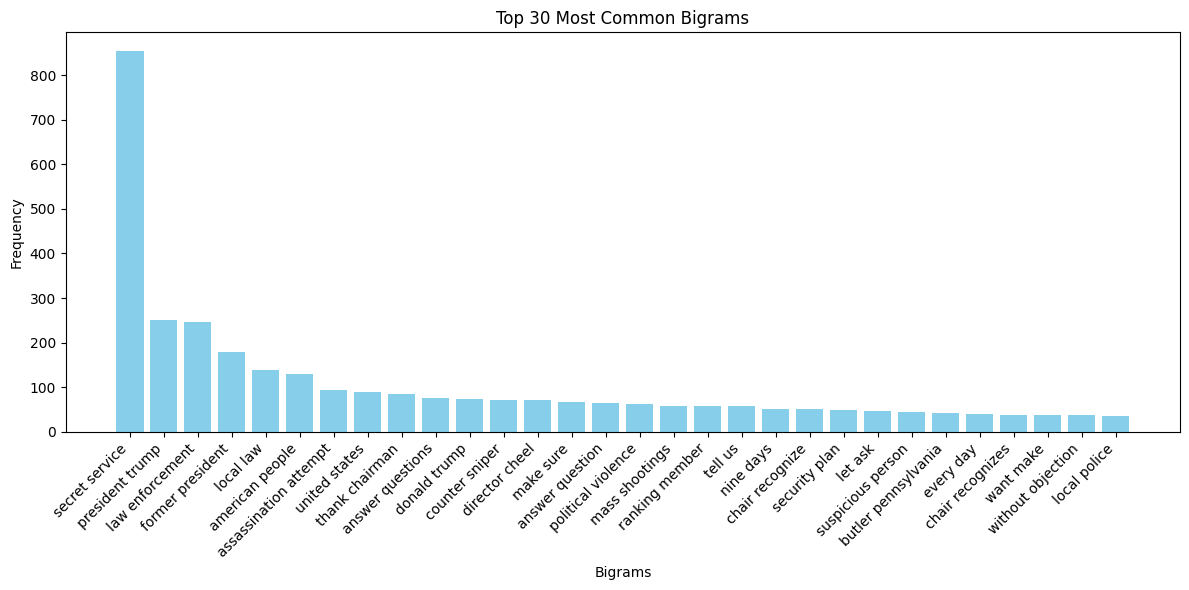

In [46]:
import matplotlib.pyplot as plt

# Extract bigram labels and their counts
bigram_labels = [' '.join(bigram) for bigram, count in common_bigrams]
bigram_counts = [count for bigram, count in common_bigrams]

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(bigram_labels, bigram_counts, color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title("Top 30 Most Common Bigrams")
plt.xlabel("Bigrams")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


In [ ]:
common_bigrams


Number of nodes: 53
Number of edges: 30


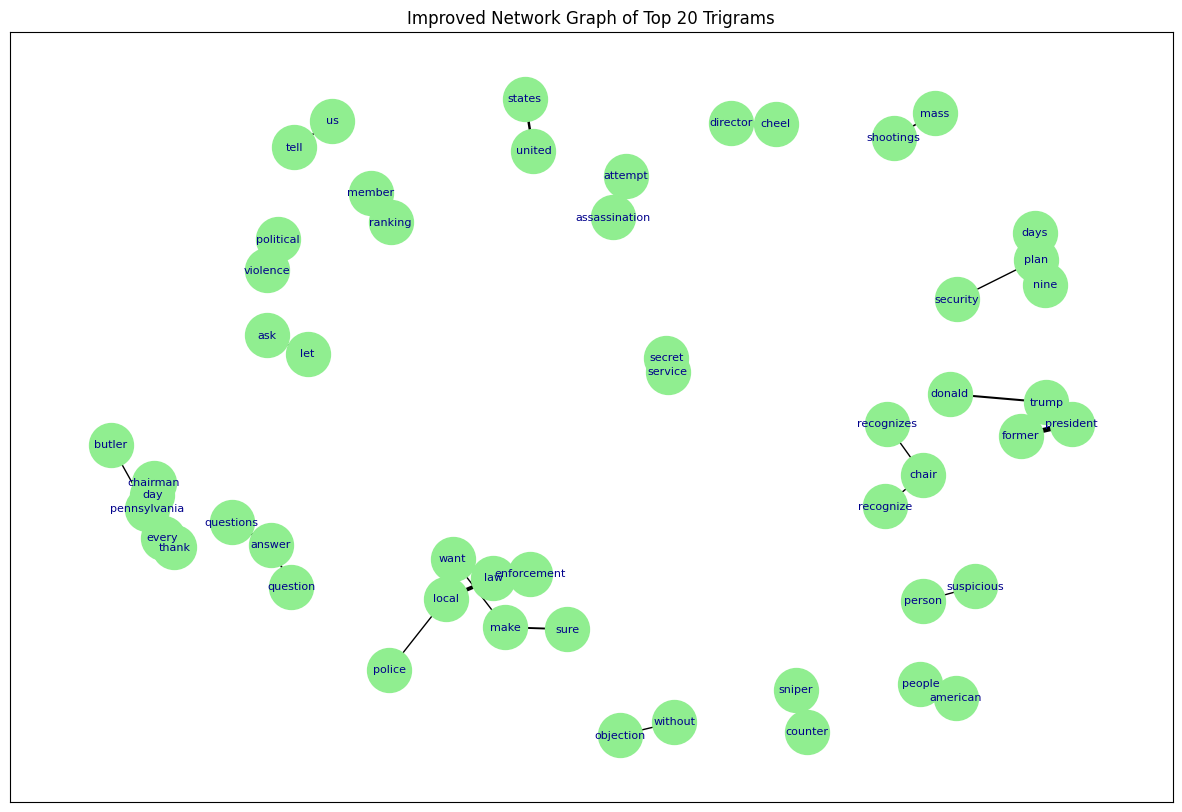

In [76]:
import matplotlib.pyplot as plt
import networkx as nx

# Initialize the graph
G = nx.Graph()

# Add edges for bigrams from `common_bigrams`
for bigram, count in common_bigrams:
    if isinstance(bigram, tuple) and len(bigram) == 2:
        word1, word2 = bigram
        G.add_edge(word1, word2, weight=count)

# Check the number of nodes and edges
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

# Draw the network graph
plt.figure(figsize=(15, 10))
# Increase the `k` parameter to spread out the nodes
pos = nx.spring_layout(G, k=0.98, iterations=40)

# Draw nodes and edges with increased edge width
nx.draw_networkx_nodes(G, pos, node_size=1000, node_color='lightgreen')
nx.draw_networkx_edges(G, pos, width=[max(G[u][v]['weight'] / 50, 1) for u, v in G.edges()], edge_color='black')
nx.draw_networkx_labels(G, pos, font_size=8, font_color='darkblue')

# Set the title and show the plot
plt.title("Improved Network Graph of Top 20 Trigrams")
plt.show()



In [65]:
print("Edges in the graph:", list(G.edges(data=True)))


Edges in the graph: [('secret', 'service', {'weight': 853}), ('president', 'trump', {'weight': 250}), ('president', 'former', {'weight': 180}), ('trump', 'donald', {'weight': 74}), ('law', 'enforcement', {'weight': 246}), ('law', 'local', {'weight': 139}), ('local', 'police', {'weight': 36}), ('american', 'people', {'weight': 129}), ('assassination', 'attempt', {'weight': 94}), ('united', 'states', {'weight': 89}), ('thank', 'chairman', {'weight': 85}), ('answer', 'questions', {'weight': 76}), ('answer', 'question', {'weight': 65}), ('counter', 'sniper', {'weight': 72}), ('director', 'cheel', {'weight': 72}), ('make', 'sure', {'weight': 68}), ('make', 'want', {'weight': 38}), ('political', 'violence', {'weight': 62}), ('mass', 'shootings', {'weight': 59}), ('ranking', 'member', {'weight': 58}), ('tell', 'us', {'weight': 58}), ('nine', 'days', {'weight': 52}), ('chair', 'recognize', {'weight': 52}), ('chair', 'recognizes', {'weight': 39}), ('security', 'plan', {'weight': 50}), ('let', '

Number of nodes: 40
Number of edges: 32


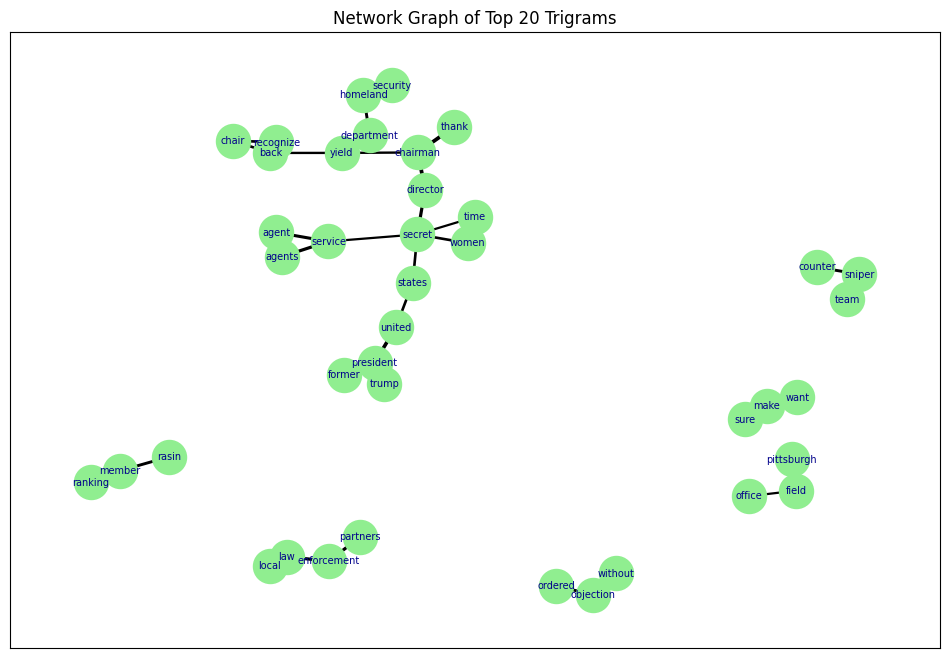

In [77]:
import matplotlib.pyplot as plt
import networkx as nx

# Initialize the graph
G = nx.Graph()

# Add edges for trigrams from `common_trigrams`
for trigram, count in common_trigrams:
    if isinstance(trigram, tuple) and len(trigram) == 3:
        word1, word2, word3 = trigram
        # Add edges between the consecutive words in the trigram
        G.add_edge(word1, word2, weight=count)
        G.add_edge(word2, word3, weight=count)

# Check the number of nodes and edges
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

# Draw the network graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.6)

# Draw nodes and edges
nx.draw_networkx_nodes(G, pos, node_size=600, node_color='lightgreen')
nx.draw_networkx_edges(G, pos, width=[G[u][v]['weight'] / 10 for u, v in G.edges()], edge_color='black')
nx.draw_networkx_labels(G, pos, font_size=7, font_color='darkblue')

# Set the title and show the plot
plt.title("Network Graph of Top 20 Trigrams")
plt.show()
